In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# CSV 파일 가져오기
from google.colab import files
uploaded = files.upload()

csv_df = pd.read_csv('dataset_SE.csv')  # CSV 파일명 입력
csv_df

Saving dataset_SE.csv to dataset_SE.csv


,Date,환율,금리,종가,ROE,영업이익률,부채비율,EPS,순이익률,BPS,PER,PBR
0,2013-01-01,1062.500000,2.75,31520.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.159320,0.032365
1,2013-01-02,1062.500000,2.75,31520.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.159320,0.032365
2,2013-01-03,1062.599976,2.75,30860.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.155984,0.031687
3,2013-01-04,1061.900024,2.75,30500.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.154164,0.031317
4,2013-01-05,1061.900024,2.75,30500.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.154164,0.031317
...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2022-12-28,1272.280029,3.25,56600.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,7.024947,1.102093
3648,2022-12-29,1274.319946,3.25,55300.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,6.863597,1.076780
3649,2022-12-30,1260.260010,3.25,55300.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,6.863597,1.076780
3650,2022-12-31,1260.260010,3.25,55300.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,6.863597,1.076780


In [ ]:
# 종가, 금리, 환율 등의 데이터만 모두 불러오고, 나머지 재무제표 데이터는 그 해 년도를 그대로 적용하여 사용, PER, PBR 등은 종가 적용해서 따로 계산해서 사용

In [ ]:
csv_df = csv_df.set_index('Date') # 날짜를 index로 바꿈
csv_df

,환율,금리,종가,ROE,영업이익률,부채비율,EPS,순이익률,BPS,PER,PBR
Date,,,,,,,,,,,
2013-01-01,1062.500000,2.75,31520.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.159320,0.032365
2013-01-02,1062.500000,2.75,31520.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.159320,0.032365
2013-01-03,1062.599976,2.75,30860.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.155984,0.031687
2013-01-04,1061.900024,2.75,30500.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.154164,0.031317
2013-01-05,1061.900024,2.75,30500.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.154164,0.031317
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,1272.280029,3.25,56600.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,7.024947,1.102093
2022-12-29,1274.319946,3.25,55300.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,6.863597,1.076780
2022-12-30,1260.260010,3.25,55300.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,6.863597,1.076780


In [ ]:
csv_df.dropna() # 결측치 처리!

,환율,금리,종가,ROE,영업이익률,부채비율,EPS,순이익률,BPS,PER,PBR
Date,,,,,,,,,,,
2013-01-01,1062.500000,2.75,31520.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.159320,0.032365
2013-01-02,1062.500000,2.75,31520.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.159320,0.032365
2013-01-03,1062.599976,2.75,30860.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.155984,0.031687
2013-01-04,1061.900024,2.75,30500.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.154164,0.031317
2013-01-05,1061.900024,2.75,30500.0,20.384758,16.084911,42.701448,197841.0,13.325641,973898.187839,0.154164,0.031317
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,1272.280029,3.25,56600.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,7.024947,1.102093
2022-12-29,1274.319946,3.25,55300.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,6.863597,1.076780
2022-12-30,1260.260010,3.25,55300.0,16.424694,14.352127,26.405922,8057.0,18.414395,51356.840568,6.863597,1.076780


In [ ]:
# 날짜 빼고 정규화 작업 진행 -> MinMaxScaler 사용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 정규화 수행 -> 정규화된 데이터프레임은 scaled_df
scale_cols = ['환율','금리','종가','ROE','영업이익률','부채비율','EPS','순이익률','BPS','PER','PBR']
scaled_df = scaler.fit_transform(csv_df[scale_cols]) # 정규화된 데이터는 넘파이 형태
scaled_df = pd.DataFrame(scaled_df, columns = scale_cols) # Pandas DataFrame 형태로 변경

# 테스트
scaled_df

,환율,금리,종가,ROE,영업이익률,부채비율,EPS,순이익률,BPS,PER,PBR
0,0.141107,0.818182,0.146138,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001731,0.007036
1,0.141107,0.818182,0.146138,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001731,0.007036
2,0.141332,0.818182,0.136664,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001572,0.006705
3,0.139756,0.818182,0.131496,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001485,0.006524
4,0.139756,0.818182,0.131496,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001485,0.006524
...,...,...,...,...,...,...,...,...,...,...,...
3647,0.613447,1.000000,0.506173,0.666542,0.190005,0.0,0.025159,1.000000,0.021155,0.329208,0.530447
3648,0.618040,1.000000,0.487511,0.666542,0.190005,0.0,0.025159,1.000000,0.021155,0.321512,0.518061
3649,0.586382,1.000000,0.487511,0.666542,0.190005,0.0,0.025159,1.000000,0.021155,0.321512,0.518061
3650,0.586382,1.000000,0.487511,0.666542,0.190005,0.0,0.025159,1.000000,0.021155,0.321512,0.518061


In [ ]:
# 날짜를 뺐으니 다시 날짜를 index 로 붙여줍니다
scaled_csv_df = scaled_df.set_index(csv_df.index)
scaled_csv_df

,환율,금리,종가,ROE,영업이익률,부채비율,EPS,순이익률,BPS,PER,PBR
Date,,,,,,,,,,,
2013-01-01,0.141107,0.818182,0.146138,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001731,0.007036
2013-01-02,0.141107,0.818182,0.146138,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001731,0.007036
2013-01-03,0.141332,0.818182,0.136664,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001572,0.006705
2013-01-04,0.139756,0.818182,0.131496,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001485,0.006524
2013-01-05,0.139756,0.818182,0.131496,1.000000,0.333160,1.0,1.000000,0.433271,0.816624,0.001485,0.006524
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,0.613447,1.000000,0.506173,0.666542,0.190005,0.0,0.025159,1.000000,0.021155,0.329208,0.530447
2022-12-29,0.618040,1.000000,0.487511,0.666542,0.190005,0.0,0.025159,1.000000,0.021155,0.321512,0.518061
2022-12-30,0.586382,1.000000,0.487511,0.666542,0.190005,0.0,0.025159,1.000000,0.021155,0.321512,0.518061


In [ ]:
# 입력데이터, 정답(예측하는)데이터를 정의
# 입력데이터는 -> 이전날까지의 종가와 변수들
# 정답데이터는 -> 다음날의 종가

feature_cols = ['환율','금리','종가','ROE','영업이익률','부채비율','EPS','순이익률','BPS','PER','PBR'] 
label_cols = ['종가'] 

# 입력데이터, 정답데이터 프레임 -> feature_df, label_df
feature_df = scaled_csv_df[feature_cols]
label_df = scaled_csv_df[label_cols]

print(feature_df)
print(label_df)


# DataFrame을 Numpy 형태로 저장
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

                  환율        금리        종가       ROE     영업이익률  부채비율       EPS  \
Date                                                                           
2013-01-01  0.141107  0.818182  0.146138  1.000000  0.333160   1.0  1.000000   
2013-01-02  0.141107  0.818182  0.146138  1.000000  0.333160   1.0  1.000000   
2013-01-03  0.141332  0.818182  0.136664  1.000000  0.333160   1.0  1.000000   
2013-01-04  0.139756  0.818182  0.131496  1.000000  0.333160   1.0  1.000000   
2013-01-05  0.139756  0.818182  0.131496  1.000000  0.333160   1.0  1.000000   
...              ...       ...       ...       ...       ...   ...       ...   
2022-12-28  0.613447  1.000000  0.506173  0.666542  0.190005   0.0  0.025159   
2022-12-29  0.618040  1.000000  0.487511  0.666542  0.190005   0.0  0.025159   
2022-12-30  0.586382  1.000000  0.487511  0.666542  0.190005   0.0  0.025159   
2022-12-31  0.586382  1.000000  0.487511  0.666542  0.190005   0.0  0.025159   
2023-01-01  0.586382  1.000000  0.487511

In [ ]:
window_size = 40  # 40개의 입력데이터를 이용해 바로 다음 값에 오는 Close 값을 예측할 수 있습니다

# sequence_dataset 만들기 
def make_sequence_dataset(feature, label, window_size):

  feature_list = []   # 생성될 feature list
  label_list = []     # 생성될 label list

  for i in range(len(feature)-window_size): # range는 window_size를 제외해야 하니 전체값에서 window_size를 뺀 값

    feature_list.append(feature[i:i+window_size]) # feature list 에는 i번째서 부터 window size 만큼의 입력데이터를 추가
    label_list.append(label[i+window_size]) # label list 에는 그 다음 번째('window_size + 1' 번째)의 정답데이터를 추가

  return np.array(feature_list), np.array(label_list)


X, y = make_sequence_dataset(feature_np, label_np, window_size) # X에는 np.array(feature_list), y에는 np.array(label_list) 가 대입됩니다

# shape를 출력해보면 둘다 window size를 뺀 값만큼의 데이터가 들어있는 것을 확인가능(예시의 경우 3612 - 40 = 3612)
# y shape 의 값은 처음 40개의 데이터 제외(40개로 예측을 해서 나오는 거니까)
# X shape 의 값은 마지막 40개의 데이터 제외(dataset에 없는 예측값이므로 비교해서 확인이 어려움)
print(X.shape, y.shape)

(3612, 40, 11) (3612, 1)


In [ ]:
print(len(feature_np))
print(len(X)) # 40만큼 빠져있는 값으로 출력됨

3652
3612


In [ ]:
# 모델 훈련을 위한 준비 -> 훈련을 하고, 제대로 훈련이 됐는지 테스트까지
split = int(len(X)*0.7) # 테스트 데이터로 분리 -> train:test = 7:3

# 훈련data 는 전체 데이터의 70퍼센트(예시의 경우 3612 * 70% = 2528)
X_train = X[0:split]
y_train = y[0:split]

# 테스트data 는 전체 데이터의 30퍼센트(예시의 경우 3612 * 30% = 1084)
X_test = X[split:]
y_test = y[split:]

# shape를 출력 -> 분할된 데이터 값으로 출력됨
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2528, 40, 11) (2528, 1)
(1084, 40, 11) (1084, 1)


In [ ]:
#LSTM 모델 구축
model = Sequential()

#LSTM layer
#입력층
model.add(LSTM(units = 128,    # 입력층의 unit 수는 입력데이터 feature 수보다 많이 적용 -> 모델의 표현력을 높이고 입력 데이터의 다양한 특성을 적절하게 학습
               activation = 'sigmoid',    # 활성화 함수를 sigmoid로 사용
               input_shape = (window_size, 11)))   # input_shape = (40,11) -> 다음값 예측을 위한 이전 40개(window_size)의 값과 11개의 특성을 입력으로 넣습니다 
#은닉층
model.add(Dense(units = 11, activation = 'sigmoid'))  # 은닉층의 unit 수를 입력데이터의 feature 수로 맞춤
model.add(Dense(units = 1)) # 출력층 -> 출력층의 unit 수를 조절해서 5일치, 10일치, 20일치 등등 예측이 가능!
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 128)               71680     
                                                                 
 dense_11 (Dense)            (None, 11)                1419      
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
Total params: 73,111
Trainable params: 73,111
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(loss='mse', optimizer='adam', metrics=['mae'])  # 손실 함수는 mse, 옵티마이저는 adam,  평가지표는 mae로 설정

# 조기종료 설정 -> earlystopping은 10번의 epoch통안 loss 개선이 없다면 학습을 멈춥니다
earlystopping = EarlyStopping(monitor='loss', patience=10)

# 모델 학습 -> epoch은 100번 진행합니다
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[earlystopping])

# 주가 예측 -> test 데이터를 이용하여 학습된 LSTM모델을 테스트해봅니다
predictions = model.predict(X_test)

Epoch 1/100
79/79 [==============================] - 5s 49ms/step - loss: 0.0264 - mae: 0.1283
Epoch 2/100
79/79 [==============================] - 5s 67ms/step - loss: 0.0074 - mae: 0.0660
Epoch 3/100
79/79 [==============================] - 4s 49ms/step - loss: 0.0057 - mae: 0.0563
Epoch 4/100
79/79 [==============================] - 4s 50ms/step - loss: 0.0047 - mae: 0.0510
Epoch 5/100
79/79 [==============================] - 5s 68ms/step - loss: 0.0035 - mae: 0.0445
Epoch 6/100
79/79 [==============================] - 4s 49ms/step - loss: 0.0019 - mae: 0.0335
Epoch 7/100
79/79 [==============================] - 4s 49ms/step - loss: 7.1029e-04 - mae: 0.0211
Epoch 8/100
79/79 [==============================] - 5s 68ms/step - loss: 3.3737e-04 - mae: 0.0147
Epoch 9/100
79/79 [==============================] - 4s 49ms/step - loss: 2.8912e-04 - mae: 0.0136
Epoch 10/100
79/79 [==============================] - 4s 50ms/step - loss: 2.4222e-04 - mae: 0.0124
Epoch 11/100
79/79 [=============

In [ ]:
print(predictions)

[[0.54889774]
 [0.55142194]
 [0.5441879 ]
 ...
 [0.43112838]
 [0.42679203]
 [0.42443156]]


In [ ]:
print(y_test)

[[0.55498134]
 [0.5406259 ]
 [0.56503015]
 ...
 [0.48751077]
 [0.48751077]
 [0.48751077]]


In [ ]:
# 모델의 정확도를 출력하는 연산입니다 -> 예측값 predictions와 y_test 값을 비교
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE, RMSE, R-Squared 계산
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# 결과 출력
print("MAE: {:.5f}".format(mae))
print("RMSE: {:.5f}".format(rmse))
print("R-Squared: {:.5f}".format(r2))  


MAE: 0.06111
RMSE: 0.07174
R-Squared: 0.79770


In [ ]:
# 실제값 변환해서 그래프로 시각화하는 과정입니다

# 실제값으로 변화시키기 위해서 기존 데이터에서 종가의 최댓값과 최솟값을 가져옵니다
close_min = csv_df['종가'].min()
close_max = csv_df['종가'].max()

print(csv_df['종가'].min())
print(csv_df['종가'].max())

21340.0
91000.0


In [ ]:
# MinMaxScaler이용해서 실제값으로 역변환
scaler2 = MinMaxScaler()
scaled_df2 = scaler2.fit_transform(csv_df[['종가']])

# MinMaxScaler에 정규화에 사용한 최솟값과 최댓값을 설정 -----------> 문제점이 있음. 아래에서 확인...
scaler2.data_min_ = close_min  # 정규화에 사용한 최솟값
scaler2.data_max_ = close_max  # 정규화에 사용한 최댓값

# 예측한 출력값을 실제값으로 역변환
original_pred_values = scaler2.inverse_transform(predictions)

# 역변환된 예측값 출력
original_pred_values

array([[59576.22 ],
       [59752.05 ],
       [59248.13 ],
       ...,
       [51372.402],
       [51070.332],
       [50905.902]], dtype=float32)

In [ ]:
# 테스트data의 실제값도 구해야 하는데, 정규화시켰던 값을 split했었기 때문에 원본 데이터에서 다시 분리해서 가져옵니다

# original_label_df -> 데이터셋의 실제 종가값
original_label_df = csv_df[label_cols]

# 다시 테스트용만큼의 값으로 분리
original_y_train = original_label_df[0:split]
original_y_test = original_label_df[split:]
original_y_test = original_y_test[window_size:] # 윈도우 사이즈 만큼의 데이터도 빼야 함(예측에 사용하였으므로)

# 테스트값의 실제값 출력(종가)
original_y_test

,종가
Date,
2020-01-14,60000.0
2020-01-15,59000.0
2020-01-16,60700.0
2020-01-17,61300.0
2020-01-18,61300.0
...,...
2022-12-28,56600.0
2022-12-29,55300.0
2022-12-30,55300.0


In [ ]:
# 실제값으로 MAE, RMSE, R-Squared 계산
mae = mean_absolute_error(original_y_test, original_pred_values)
rmse = mean_squared_error(original_y_test, original_pred_values, squared=False)
r2 = r2_score(original_y_test, original_pred_values)

# 결과 출력 -> 정규화값으로 했을 때와 거의 일치합니다
print("MAE: {:.5f}".format(mae))
print("RMSE: {:.5f}".format(rmse))
print("R-Squared: {:.5f}".format(r2))  


MAE: 4256.72448
RMSE: 4997.21560
R-Squared: 0.79769


In [ ]:
#그래프 시각화를 위해 표로 다시 만들어 봅니다
close_test_and_pred = original_y_test

close_test_and_pred.insert(1,'예측종가', original_pred_values)

close_test_and_pred

,종가,예측종가
Date,,
2020-01-14,60000.0,59576.218750
2020-01-15,59000.0,59752.050781
2020-01-16,60700.0,59248.128906
2020-01-17,61300.0,60131.515625
2020-01-18,61300.0,60758.039062
...,...,...
2022-12-28,56600.0,53110.050781
2022-12-29,55300.0,52321.656250
2022-12-30,55300.0,51372.402344


<Axes: title={'center': 'Line Plot'}, xlabel='Date', ylabel='Close'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing f

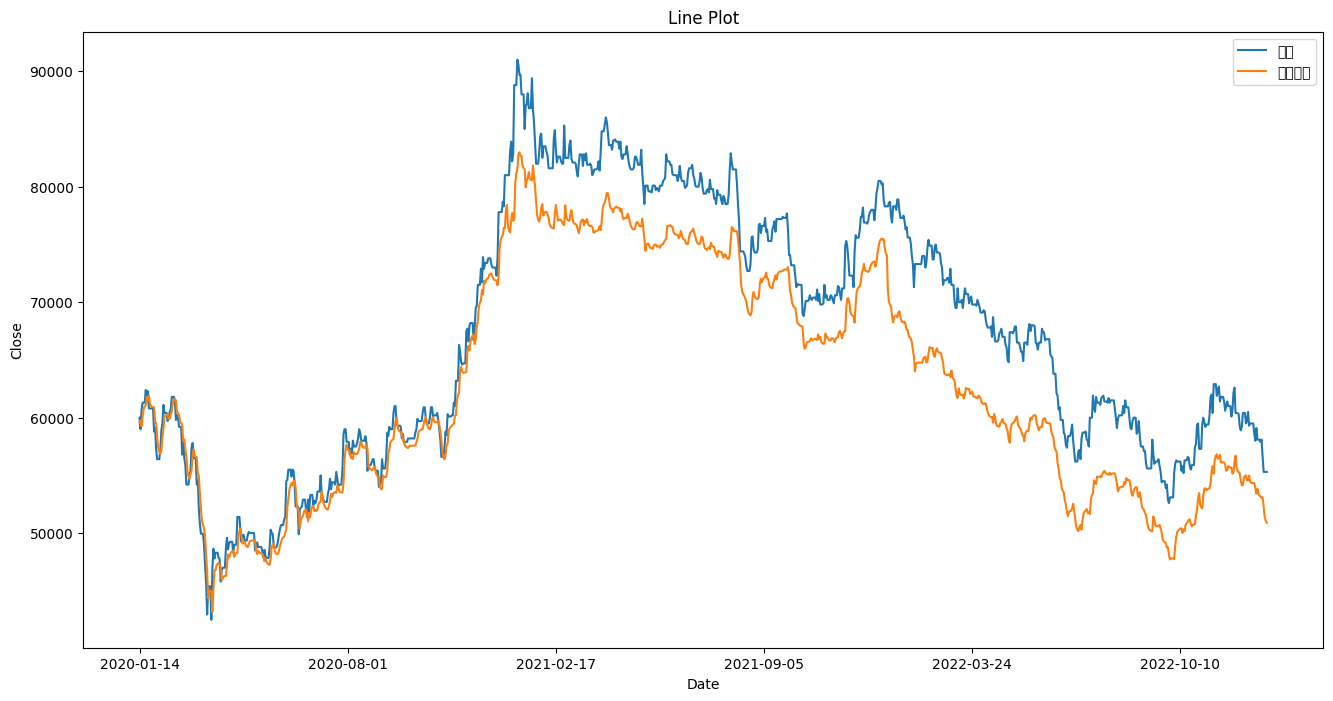

In [ ]:
#테스트 결과를 시각화합니다
close_test_and_pred.plot(title='Line Plot', xlabel='Date', ylabel='Close', figsize=(16,8))

**문제점:**

1.   실제 값으로 변환하기 위해, 출력 데이터의 정규화 이전 값의 최솟값과 최댓값, 즉 종가데이터의 최솟값과 최댓값 기반으로 범위를 설정 -> 테스트 상에서는 테스트셋의 예측값이 최솟값과 최댓값 범위 사이에 있어 정확도가 맞아 떨어진 경우같음...

  - 예측 값이 기존 종가데이터의 최솟값 이하이거나, 최댓값 이상일 때, 
아무리 실제랑 차이가 나더라도 종가 데이터셋의 최솟값과 최댓값 사이의 범위안으로 가격이 한정된다.

      현 주가가 기존 데이터셋의 최댓값에 도달하고 그 이상 올라갈 때에도 예측값이 최댓값에 머문다는 뜻

  - 상한선/하한선 등의 설정으로 문제해결 가능할 듯 

  <챗gpt의 의견>

  ```
  예측한 값이 정규화된 출력 데이터의 최소값 이하나 최대값 이상이 될 수 있다는 점에 주의해야 합니다. 정규화된 데이터의 범위는 일반적으로 0과 1 사이로 제한되기 때문에, 예측한 값도 해당 범위 내에 존재할 것으로 예상됩니다.

  만약 예측한 값이 정규화된 범위를 벗어날 경우, 이는 역변환이 수행되지 않은 상태에서의 예측이므로 역변환 후의 실제값이 아닐 수 있습니다. 이러한 경우에는 역변환 이후에도 정규화된 범위 내로 값을 조정해야 합니다.

  예를 들어, 예측한 값을 역변환한 후에도 최소값 이하나 최대값 이상인 경우에는 해당 값을 최소값 또는 최대값으로 강제로 조정하는 등의 후처리 작업을 수행해야 합니다. 이렇게 함으로써 예측값이 데이터의 유효 범위 내에 유지될 수 있습니다.

  따라서, 예측한 값을 역변환할 때 정규화된 데이터의 최소값과 최대값을 기준으로 범위를 확인하고, 이를 넘어가는 값에 대해서는 추가적인 조치를 취해야 합니다.
  ```



2.   정확도가 너무 높다 -> 모델의 과적합 의심

